In [12]:
import datetime
import os
import pathlib
import string
from PIL import Image
now = datetime.datetime.utcnow()
print(now)

2019-12-13 17:03:15.141966


In [2]:
def process_directory(path):
    start = datetime.datetime.utcnow()
    walker = next(os.walk(path))
    print(f"{start.isoformat()} for {len(walker[-1])} files")
    for filename in walker[-1]:
        filepath = os.path.join(path, filename)
        normalize_size(os.path.join(path, filename))
    end = datetime.datetime.utcnow()
    print(f"Finished at {end.isoformat()}")

In [3]:
def normalize_size(path):
    original = Image.open(path)
    xsize, ysize = original.size
    if xsize == 56 and ysize == 56:
        return
    center_x, center_y = int((56 - xsize)/ 2), int((56 - ysize) / 2)
    normalized = Image.new('RGB', (56,56), color='white')
    normalized.paste(original, (center_x, center_y))
    normalized.save(path, "PNG")
    

In [27]:
def gap_analysis(train_goal, validation_goal):
    start = datetime.datetime.utcnow()
    print(f"{start.isoformat()} Gap Analysis for Training and Validation")
    training = pathlib.Path("/Users/jpnelson/2019/jermswriting/data/train")
    print("Training Statistics")
    total = 0
    classes = 0
    for x in sorted(training.iterdir()):
        current = len(list(x.glob('*.png')))
        total += current
        classes += 1
        print(f"{x} current {current} needs {train_goal-current}")
    print(f"Total training images {total} need {classes*train_goal}")


In [28]:
gap_analysis(20, 5)

2019-12-13T21:20:54.108168 Gap Analysis for Training and Validation
Training Statistics
/Users/jpnelson/2019/jermswriting/data/train/0 current 5 needs 15
/Users/jpnelson/2019/jermswriting/data/train/1 current 2 needs 18
/Users/jpnelson/2019/jermswriting/data/train/2 current 3 needs 17
/Users/jpnelson/2019/jermswriting/data/train/3 current 4 needs 16
/Users/jpnelson/2019/jermswriting/data/train/4 current 3 needs 17
/Users/jpnelson/2019/jermswriting/data/train/5 current 4 needs 16
/Users/jpnelson/2019/jermswriting/data/train/6 current 3 needs 17
/Users/jpnelson/2019/jermswriting/data/train/7 current 4 needs 16
/Users/jpnelson/2019/jermswriting/data/train/8 current 3 needs 17
/Users/jpnelson/2019/jermswriting/data/train/9 current 4 needs 16
/Users/jpnelson/2019/jermswriting/data/train/a current 7 needs 13
/Users/jpnelson/2019/jermswriting/data/train/b current 4 needs 16
/Users/jpnelson/2019/jermswriting/data/train/c current 6 needs 14
/Users/jpnelson/2019/jermswriting/data/train/d current

# 2019-12-13 
## Normalize images, identifying gaps, and starting first model
Before I begin building and testing the first Keras model for the handwriting identification, my first pass is to have 20 images per training class and 5 images per validation just to get a sense of what the accuracy and how much more data is needed to improve the neural net.

## 2019-12-11
# Normalize images

### Training images

In [9]:
for num in range(6,10):
    process_directory(f"/Users/jpnelson/2019/jermswriting/data/train/{num}")
for char in string.ascii_lowercase[1:]:
    process_directory(f"/Users/jpnelson/2019/jermswriting/data/train/{char}")

2019-12-11T17:29:17.460199 for 3 files
skipping /Users/jpnelson/2019/jermswriting/data/train/6/6.png
skipping /Users/jpnelson/2019/jermswriting/data/train/6/2.png
skipping /Users/jpnelson/2019/jermswriting/data/train/6/1.png
Finished at 2019-12-11T17:29:17.462648
2019-12-11T17:29:17.462676 for 4 files
skipping /Users/jpnelson/2019/jermswriting/data/train/7/4.png
skipping /Users/jpnelson/2019/jermswriting/data/train/7/2.png
skipping /Users/jpnelson/2019/jermswriting/data/train/7/3.png
skipping /Users/jpnelson/2019/jermswriting/data/train/7/1.png
Finished at 2019-12-11T17:29:17.464623
2019-12-11T17:29:17.464674 for 3 files
skipping /Users/jpnelson/2019/jermswriting/data/train/8/2.png
skipping /Users/jpnelson/2019/jermswriting/data/train/8/3.png
skipping /Users/jpnelson/2019/jermswriting/data/train/8/1.png
Finished at 2019-12-11T17:29:17.466147
2019-12-11T17:29:17.466184 for 4 files
skipping /Users/jpnelson/2019/jermswriting/data/train/9/4.png
skipping /Users/jpnelson/2019/jermswriting/da

## 2019-12-09 
# Normalizing images 

In [23]:
normalized_image = Image.new('RGB', (56,56), color='white')

In [3]:
five_three = Image.open('/Users/jpnelson/2019/jermswriting/data/train/5/3.png')

In [7]:
xsize, ysize = five_three.size

In [21]:
int((56-xsize) / 2), int((56-ysize) / 2)

(15, 14)

In [25]:
normalized_image.paste(five_three, (int((56-xsize) / 2), int((56-ysize) / 2)))
normalized_image.save("/Users/jpnelson/2019/tmp/merged.png", "PNG")

In [28]:
normalize_size('/Users/jpnelson/2019/jermswriting/data/train/5/5.png')

In [46]:
process_directory("/Users/jpnelson/2019/jermswriting/data/train/a")

2019-12-09T22:03:15.017557 for 5 files
Finished at 2019-12-09T22:03:15.032884


In [49]:
for num in range(6,10):
    process_directory(f"/Users/jpnelson/2019/jermswriting/data/train/{num}")
for char in string.ascii_lowercase[1:]:
    process_directory(f"/Users/jpnelson/2019/jermswriting/data/train/{char}")

2019-12-09T22:05:34.510446 for 3 files
Finished at 2019-12-09T22:05:34.517885
2019-12-09T22:05:34.517961 for 4 files
Finished at 2019-12-09T22:05:34.526216
2019-12-09T22:05:34.526298 for 3 files
Finished at 2019-12-09T22:05:34.533504
2019-12-09T22:05:34.533823 for 4 files
Finished at 2019-12-09T22:05:34.541644


In [53]:
import string
for char in string.ascii_lowercase[1:]:
    process_directory(f"/Users/jpnelson/2019/jermswriting/data/train/{char}")

2019-12-09T22:20:30.570088 for 4 files
Finished at 2019-12-09T22:20:30.581726
2019-12-09T22:20:30.581809 for 5 files
Finished at 2019-12-09T22:20:30.593078
2019-12-09T22:20:30.593167 for 5 files
Finished at 2019-12-09T22:20:30.603283
2019-12-09T22:20:30.603387 for 4 files
Finished at 2019-12-09T22:20:30.609943
2019-12-09T22:20:30.610063 for 5 files
Finished at 2019-12-09T22:20:30.619084
2019-12-09T22:20:30.619179 for 4 files
Finished at 2019-12-09T22:20:30.627800
2019-12-09T22:20:30.627890 for 4 files
Finished at 2019-12-09T22:20:30.635831
2019-12-09T22:20:30.636005 for 5 files
Finished at 2019-12-09T22:20:30.646820
2019-12-09T22:20:30.646893 for 3 files
Finished at 2019-12-09T22:20:30.653105
2019-12-09T22:20:30.653184 for 5 files
Finished at 2019-12-09T22:20:30.662821
2019-12-09T22:20:30.663165 for 5 files
Finished at 2019-12-09T22:20:30.672579
2019-12-09T22:20:30.672657 for 5 files
Finished at 2019-12-09T22:20:30.682094
2019-12-09T22:20:30.682185 for 5 files
Finished at 2019-12-09T22

In [59]:
for num in range(10):
    process_directory(f"/Users/jpnelson/2019/jermswriting/data/validation/{num}")

2019-12-10T00:02:01.096861 for 3 files
skipping /Users/jpnelson/2019/jermswriting/data/validation/0/2.png
skipping /Users/jpnelson/2019/jermswriting/data/validation/0/3.png
skipping /Users/jpnelson/2019/jermswriting/data/validation/0/1.png
Finished at 2019-12-10T00:02:01.100764
2019-12-10T00:02:01.100798 for 1 files
skipping /Users/jpnelson/2019/jermswriting/data/validation/1/1.png
Finished at 2019-12-10T00:02:01.102243
2019-12-10T00:02:01.102291 for 1 files
skipping /Users/jpnelson/2019/jermswriting/data/validation/2/2.png
Finished at 2019-12-10T00:02:01.103861
2019-12-10T00:02:01.103897 for 1 files
skipping /Users/jpnelson/2019/jermswriting/data/validation/3/3.png
Finished at 2019-12-10T00:02:01.105448
2019-12-10T00:02:01.105490 for 1 files
skipping /Users/jpnelson/2019/jermswriting/data/validation/4/1.png
Finished at 2019-12-10T00:02:01.107017
2019-12-10T00:02:01.107065 for 1 files
skipping /Users/jpnelson/2019/jermswriting/data/validation/5/1.png
Finished at 2019-12-10T00:02:01.108

In [61]:
for char in string.ascii_lowercase[1:]:
    process_directory(f"/Users/jpnelson/2019/jermswriting/data/validation/{char}")

2019-12-10T00:02:33.857714 for 4 files
skipping /Users/jpnelson/2019/jermswriting/data/validation/b/2.png
skipping /Users/jpnelson/2019/jermswriting/data/validation/b/1.png
Finished at 2019-12-10T00:02:33.865171
2019-12-10T00:02:33.865321 for 4 files
skipping /Users/jpnelson/2019/jermswriting/data/validation/c/2.png
skipping /Users/jpnelson/2019/jermswriting/data/validation/c/1.png
Finished at 2019-12-10T00:02:33.870790
2019-12-10T00:02:33.870825 for 4 files
skipping /Users/jpnelson/2019/jermswriting/data/validation/d/2.png
skipping /Users/jpnelson/2019/jermswriting/data/validation/d/1.png
Finished at 2019-12-10T00:02:33.877141
2019-12-10T00:02:33.877201 for 4 files
skipping /Users/jpnelson/2019/jermswriting/data/validation/e/2.png
skipping /Users/jpnelson/2019/jermswriting/data/validation/e/1.png
Finished at 2019-12-10T00:02:33.883471
2019-12-10T00:02:33.883516 for 4 files
skipping /Users/jpnelson/2019/jermswriting/data/validation/f/2.png
skipping /Users/jpnelson/2019/jermswriting/dat

In [89]:
import matplotlib.pyplot as plt
import numpy as np

def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(np.reshape(image_batch[n], (56,56)))
      print(np.argwhere(label_batch[n]==1))
      #plt.title(CLASS_NAMES[np.argwhere(label_batch[n]==1)[0][0]])
      plt.axis('off')



In [66]:
import tensorflow as tf 
from tensorflow import keras
import pathlib

In [73]:
# define data paths and constants
train_dir = pathlib.Path('/Users/jpnelson/2019/jermswriting/data/train')
valid_dir = pathlib.Path('/Users/jpnelson/2019/jermswriting/data/validation')

BATCH_SIZE = 100
IMG_HEIGHT, IMG_WIDTH = 56, 56
CLASS_NAMES = sorted(d.stem for d in train_dir.glob('*'))
print(CLASS_NAMES)


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [74]:
import sys
sys.path.append('/Users/jpnelson/2019/jermswriting/')

In [76]:
import training

In [78]:
valid_imgs, valid_labels = zip(*(training.process_path(f_p) for f_p in valid_dir.glob('*/*')))

/Users/jpnelson/2019/jermswriting/training.py:45: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return file_path.parts[-2] == np.array(CLASS_NAMES)


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


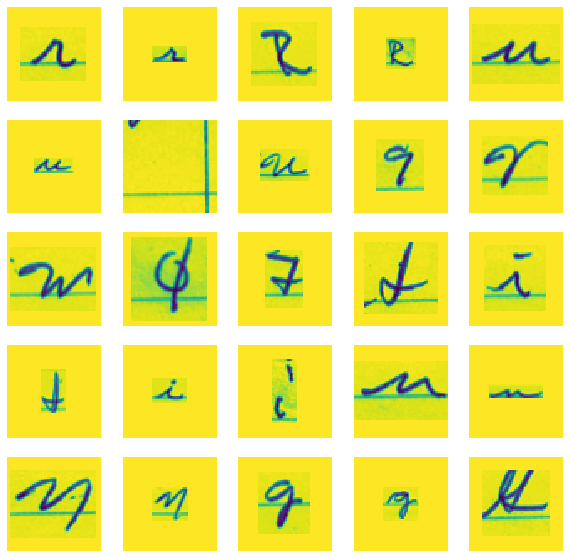

In [90]:
show_batch(valid_imgs, valid_labels)

In [80]:
CLASS_NAMES[0]

'0'